In [1]:
import pandas as pd
import psycopg2
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import statsmodels.api as sm

import holoviews as hv
 
from bokeh.plotting import show

# Cargando datos

In [2]:
datos = pd.read_csv("DatosBAIN081.csv")
datos['Carrera'] = datos['Carrera'].astype('category')
datos['Año de ingreso'] = datos['Año de ingreso'].astype('category')
datos['Tipo de educacion'] = datos['Tipo de educacion'].astype('category')
datos['Id de postulacion'] = datos['Id de postulacion'].astype('category')
datos

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,...,Año de ingreso,Tipo de educacion,¿Es de Valdivia?,Id de postulacion,Puntaje Ponderado,PSU Lenguaje,PSU Matematica,PSU Ciencias,Puntaje Ranking,Puntaje NEM
0,4.2,0,2.88,4.38,3.63,0,1,4.1,0,1,...,2016,SIN INFORMACION ...,0,PSU,616.20,433,619,503,702,644
1,4.1,0,4.95,5.52,5.22,0,1,5.1,0,1,...,2017,C.H - DIURNA ...,0,PSU,731.10,660,713,635,833,719
2,3.5,0,4.32,5.07,4.68,0,1,4.0,0,1,...,2017,C.H - DIURNA ...,0,PSU,668.45,630,629,602,742,698
3,4.0,0,4.48,5.51,4.96,0,1,4.6,0,1,...,2017,C.H - DIURNA ...,0,PSU,622.95,672,634,611,615,595
4,2.4,0,4.60,4.75,4.67,0,1,4.0,0,1,...,2017,C.H - DIURNA ...,1,PSU,602.15,603,634,639,569,569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2.6,0,4.44,3.75,4.77,0,1,4.4,1,1,...,2021,SIN INFORMACION ...,1,PSU,672.10,525,627,608,795,695
596,3.0,0,4.43,3.07,4.20,0,1,4.1,1,1,...,2021,SIN INFORMACION ...,1,PSU,563.00,530,589,420,581,581
597,1.6,0,3.47,3.59,4.04,0,1,4.1,1,1,...,2021,SIN INFORMACION ...,1,PSU,570.70,530,563,519,601,603
598,6.1,0,6.35,6.64,6.49,0,1,6.5,0,1,...,2022,C.H - DIURNA ...,0,PSU,757.50,767,726,633,827,790


# Análisis exploratorio

In [3]:
pd.set_option('display.max_columns', None)
datos.describe()

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online,¿Es de Valdivia?,Puntaje Ponderado,PSU Lenguaje,PSU Matematica,PSU Ciencias,Puntaje Ranking,Puntaje NEM
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.77100,0.410000,4.774617,4.782767,5.005500,0.03000,1.300000,4.655333,0.498333,1.291667,4.881833,0.506667,1.538333,4.597500,0.481667,1.566667,4.459667,0.406667,0.251667,627.398748,570.921667,622.220000,569.855000,666.606667,634.023333
std,1.02439,0.492244,0.788715,0.869687,0.477571,0.17073,0.651184,0.624223,0.500414,0.622288,0.712038,0.500373,0.890610,0.679937,0.500081,0.797883,0.560503,0.491622,0.434333,62.547813,75.994017,58.452968,69.527722,109.298882,87.064976
min,1.10000,0.000000,1.000000,1.000000,3.530000,0.00000,1.000000,4.000000,0.000000,1.000000,3.700000,0.000000,1.000000,1.700000,0.000000,1.000000,2.200000,0.000000,0.000000,466.200000,297.000000,393.000000,335.000000,417.000000,414.000000
25%,3.30000,0.000000,4.420000,4.227500,4.690000,0.00000,1.000000,4.200000,0.000000,1.000000,4.300000,0.000000,1.000000,4.100000,0.000000,1.000000,4.000000,0.000000,0.000000,581.250000,517.000000,586.750000,523.000000,580.750000,569.000000
50%,4.00000,0.000000,4.875000,4.880000,4.960000,0.00000,1.000000,4.500000,0.000000,1.000000,4.700000,1.000000,1.000000,4.450000,0.000000,1.000000,4.400000,0.000000,0.000000,622.975000,569.000000,623.000000,577.000000,671.000000,634.000000
75%,4.40000,1.000000,5.250000,5.382500,5.310000,0.00000,1.000000,5.000000,1.000000,1.000000,5.300000,1.000000,2.000000,5.000000,1.000000,2.000000,4.725000,1.000000,1.000000,672.025000,620.000000,660.000000,618.000000,752.500000,706.000000
max,6.50000,1.000000,6.540000,6.640000,6.570000,1.00000,5.000000,7.000000,1.000000,5.000000,6.900000,1.000000,6.000000,7.000000,1.000000,5.000000,6.900000,1.000000,1.000000,880.531000,781.000000,814.000000,782.000000,850.000000,818.000000


In [4]:
continuas_y_ordinales = ["BAIN081-14 promedio", "PSP 1 semestre anterior", "PSP 2 semestres anteriores", "PGA", 
                         "BAIN065-14 intentos", "BAIN065-14 promedio", "BAIN067-14 intentos", "BAIN067-14 promedio", 
                         "BAIN073-14 intentos", "BAIN073-14 promedio", "BAIN075-14 intentos", "BAIN075-14 promedio", 
                         "Puntaje Ponderado", "PSU Lenguaje", "PSU Matematica", "PSU Ciencias", "Puntaje Ranking", 
                         "Puntaje NEM"]

pd.set_option('display.max_columns', None)
datos[continuas_y_ordinales].describe()

,BAIN081-14 promedio,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,BAIN065-14 intentos,BAIN065-14 promedio,BAIN067-14 intentos,BAIN067-14 promedio,BAIN073-14 intentos,BAIN073-14 promedio,BAIN075-14 intentos,BAIN075-14 promedio,Puntaje Ponderado,PSU Lenguaje,PSU Matematica,PSU Ciencias,Puntaje Ranking,Puntaje NEM
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.77100,4.774617,4.782767,5.005500,1.300000,4.655333,1.291667,4.881833,1.538333,4.597500,1.566667,4.459667,627.398748,570.921667,622.220000,569.855000,666.606667,634.023333
std,1.02439,0.788715,0.869687,0.477571,0.651184,0.624223,0.622288,0.712038,0.890610,0.679937,0.797883,0.560503,62.547813,75.994017,58.452968,69.527722,109.298882,87.064976
min,1.10000,1.000000,1.000000,3.530000,1.000000,4.000000,1.000000,3.700000,1.000000,1.700000,1.000000,2.200000,466.200000,297.000000,393.000000,335.000000,417.000000,414.000000
25%,3.30000,4.420000,4.227500,4.690000,1.000000,4.200000,1.000000,4.300000,1.000000,4.100000,1.000000,4.000000,581.250000,517.000000,586.750000,523.000000,580.750000,569.000000
50%,4.00000,4.875000,4.880000,4.960000,1.000000,4.500000,1.000000,4.700000,1.000000,4.450000,1.000000,4.400000,622.975000,569.000000,623.000000,577.000000,671.000000,634.000000
75%,4.40000,5.250000,5.382500,5.310000,1.000000,5.000000,1.000000,5.300000,2.000000,5.000000,2.000000,4.725000,672.025000,620.000000,660.000000,618.000000,752.500000,706.000000
max,6.50000,6.540000,6.640000,6.570000,5.000000,7.000000,5.000000,6.900000,6.000000,7.000000,5.000000,6.900000,880.531000,781.000000,814.000000,782.000000,850.000000,818.000000


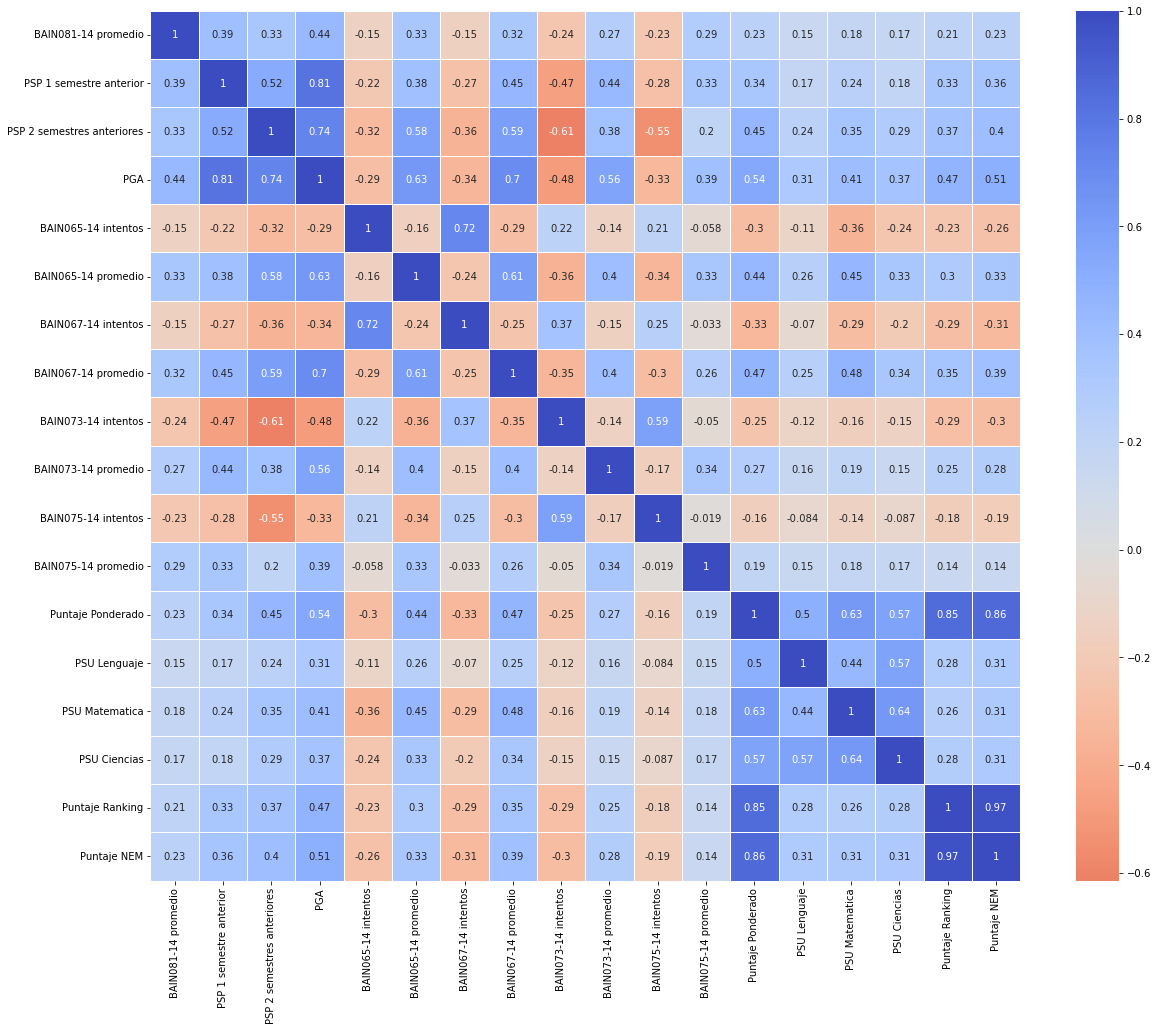

In [5]:
continuas_y_ordinales = ["BAIN081-14 promedio", "PSP 1 semestre anterior", "PSP 2 semestres anteriores", "PGA", "BAIN065-14 intentos", "BAIN065-14 promedio", "BAIN067-14 intentos", "BAIN067-14 promedio", "BAIN073-14 intentos", "BAIN073-14 promedio", "BAIN075-14 intentos", "BAIN075-14 promedio", "Puntaje Ponderado", "PSU Lenguaje", "PSU Matematica", "PSU Ciencias", "Puntaje Ranking", "Puntaje NEM"]

correlation_matrix = datos[continuas_y_ordinales].corr()

# Crea un mapa de calor con colores que representan el nivel de correlación
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', center=0, linewidths=0.5, square=True)

# Muestra el mapa de calor
plt.show()

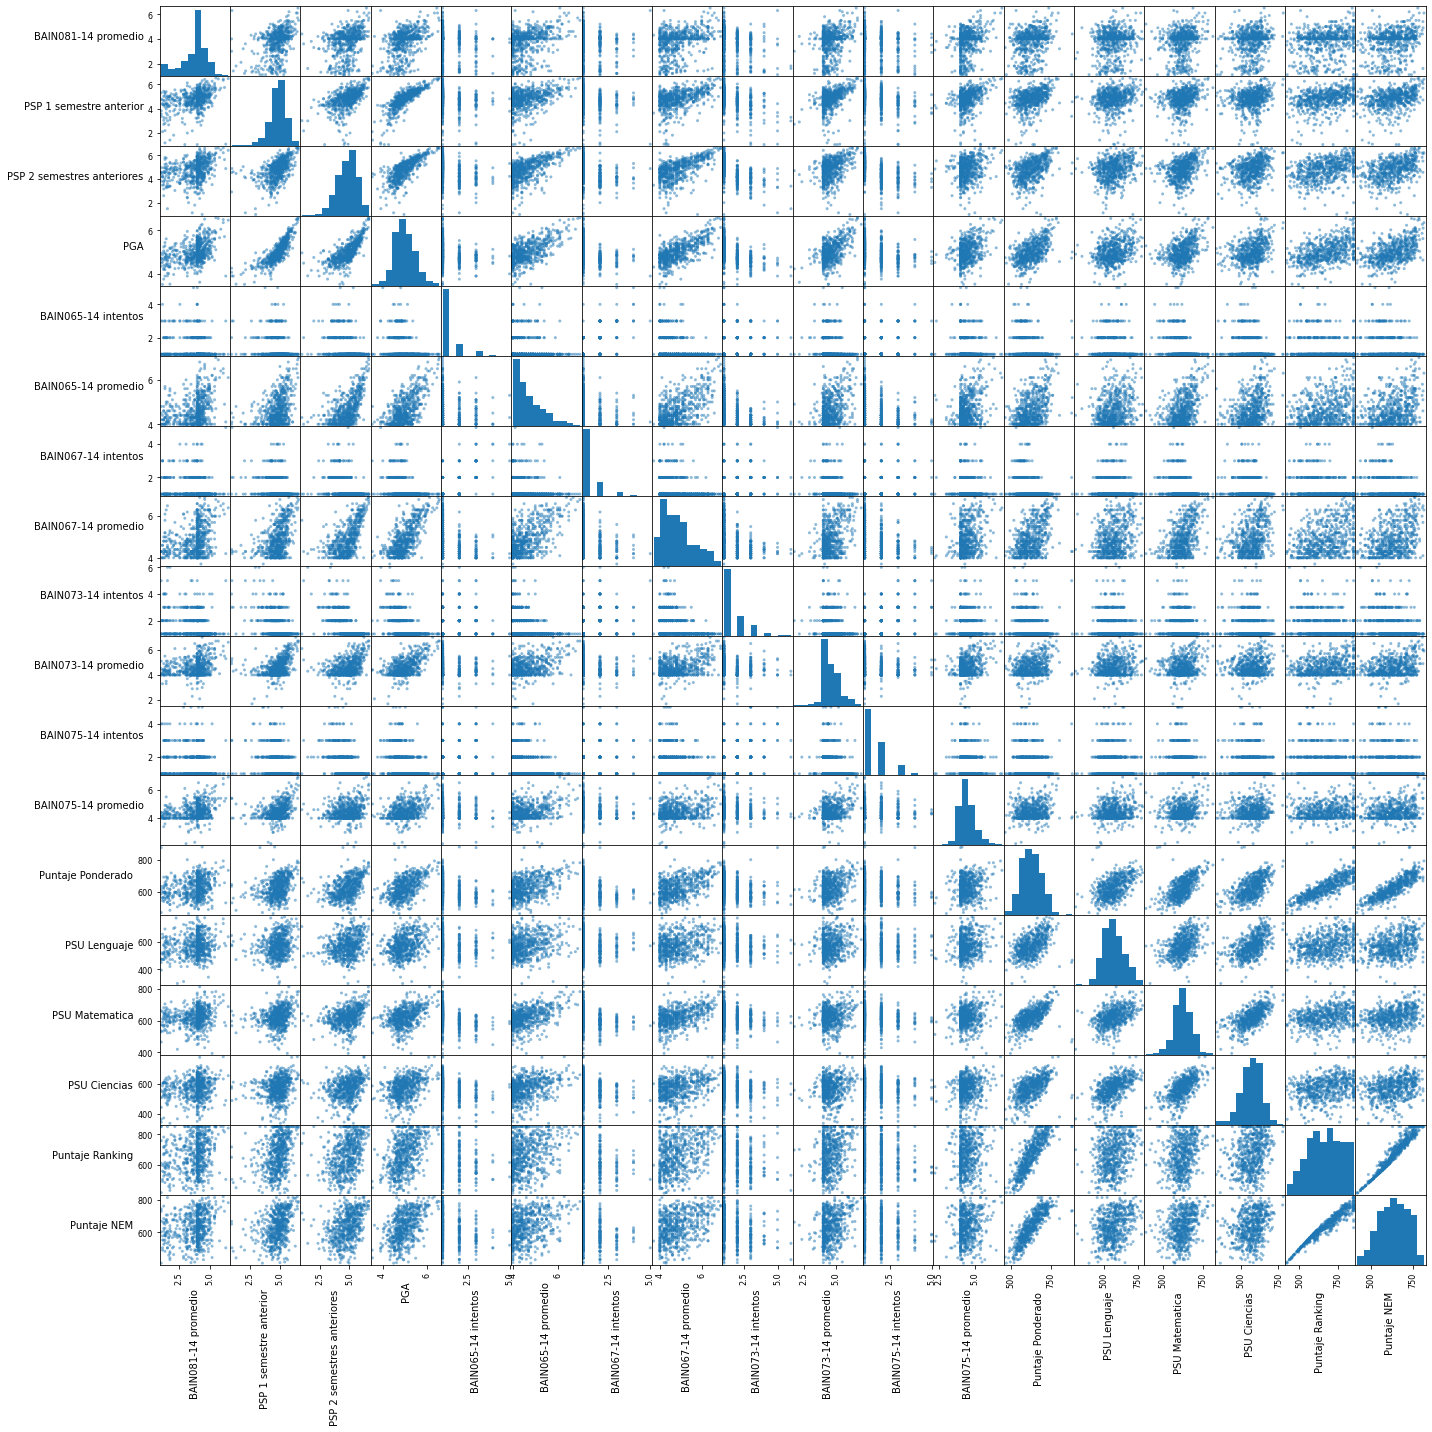

In [6]:
axes = pd.plotting.scatter_matrix(datos[continuas_y_ordinales], figsize=(20, 20));
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

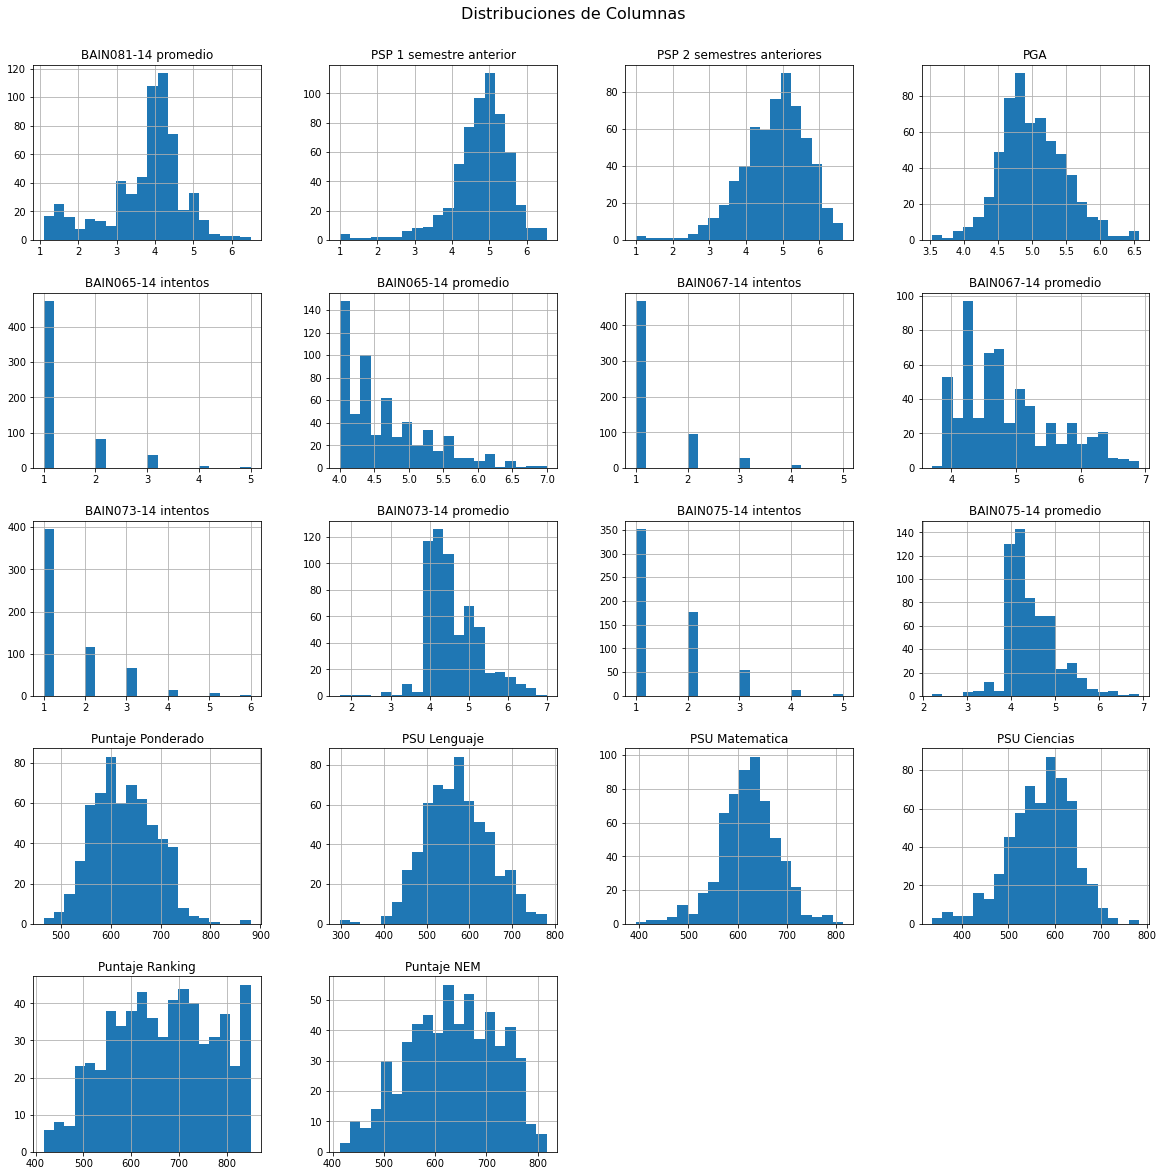

In [7]:
# Visualizar las distribuciones usando histogramas
datos[continuas_y_ordinales].hist(bins=20, figsize=(20, 20))
plt.suptitle('Distribuciones de Columnas', x=0.5, y=0.92, fontsize=16)
plt.show()

# Comparando muestra con la población

In [8]:
todos_psu = pd.read_excel("postulantesFCI_2017-2022.xlsx").drop_duplicates(subset='IdPostulante', keep='last')
todos_psu = todos_psu[['PuntajePonderado', 'PSUPuntajeVerbal', 'PSUPuntajeMatematica', 'PSUPuntajeCiencias', 'PuntajeRanking', 'PSUPuntajeEM']]
todos_psu

,PuntajePonderado,PSUPuntajeVerbal,PSUPuntajeMatematica,PSUPuntajeCiencias,PuntajeRanking,PSUPuntajeEM
0,503.95,486,496,497,521,509
1,455.80,458,504,518,404,404
2,570.00,541,651,635,499,499
5,552.85,534,550,512,575,560
6,663.55,582,649,638,720,672
...,...,...,...,...,...,...
4894,643.40,564,560,584,779,709
4895,466.90,584,501,536,390,375
4896,644.80,569,599,550,740,713
4897,601.00,567,598,526,631,632


In [9]:
psu_clumns = ["Puntaje Ponderado", "PSU Lenguaje", "PSU Matematica", "PSU Ciencias", "Puntaje Ranking", "Puntaje NEM"]

for i in range(6):
    ks_statistic, p_value = stats.kstest(datos[psu_clumns].iloc[:,i], todos_psu.iloc[:,i])
    mean_diff = datos[psu_clumns].iloc[:,i].mean() - todos_psu.iloc[:,i].mean()
    print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
    print(f"p-value: {p_value}")
    print(f"Diferencia de medias: {mean_diff}")
    print()

Estadístico de Kolmogorov-Smirnov: 0.19681477698331631
p-value: 4.009623355729818e-18
Diferencia de medias: 30.010440314947346

Estadístico de Kolmogorov-Smirnov: 0.12053285665645216
p-value: 4.79116937823794e-07
Diferencia de medias: 18.885660537963872

Estadístico de Kolmogorov-Smirnov: 0.2328328226081035
p-value: 2.9431130215497316e-25
Diferencia de medias: 33.14134831460672

Estadístico de Kolmogorov-Smirnov: 0.16964249233912154
p-value: 1.4846204511881233e-13
Diferencia de medias: 31.725275791624085

Estadístico de Kolmogorov-Smirnov: 0.14191351719441608
p-value: 1.322029640393529e-09
Diferencia de medias: 38.33802519577807

Estadístico de Kolmogorov-Smirnov: 0.14339972761321076
p-value: 8.464447089684822e-10
Diferencia de medias: 33.21281239359894



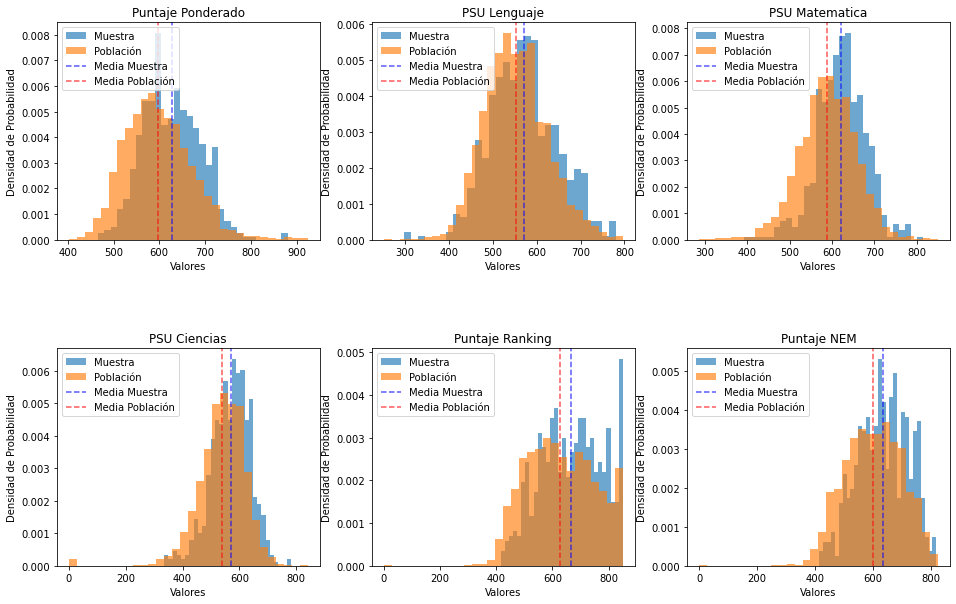

In [10]:
# Configuración de subgráficos
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(6):
    
    ax[i // 3, i % 3].hist(datos[psu_clumns].iloc[:,i], bins=30, density=True, alpha=0.65, histtype='bar', label="Muestra")
    ax[i // 3, i % 3].hist(todos_psu.iloc[:,i], bins=30, density=True, alpha=0.65, histtype='bar', label="Población")
    
    ax[i // 3, i % 3].axvline(x=datos[psu_clumns].iloc[:,i].mean(), color='blue', alpha=0.65, linestyle='--', label='Media Muestra')
    ax[i // 3, i % 3].axvline(x=todos_psu.iloc[:,i].mean(), color='red', alpha=0.65, linestyle='--', label='Media Población')
    
    ax[i // 3, i % 3].set_title(f'{datos[psu_clumns].columns[i]}')
    ax[i // 3, i % 3].set_xlabel('Valores')
    ax[i // 3, i % 3].set_ylabel('Densidad de Probabilidad')
    ax[i // 3, i % 3].legend(loc=2);
    
plt.show()

# Estandarización

In [11]:
datos = datos.drop(['Puntaje Ranking'], axis=1)
continuas_y_ordinales = ["BAIN081-14 promedio", "PSP 1 semestre anterior", "PSP 2 semestres anteriores", "PGA", "BAIN065-14 intentos", "BAIN065-14 promedio", "BAIN067-14 intentos", "BAIN067-14 promedio", "BAIN073-14 intentos", "BAIN073-14 promedio", "BAIN075-14 intentos", "BAIN075-14 promedio", "Puntaje Ponderado", "PSU Lenguaje", "PSU Matematica", "PSU Ciencias", "Puntaje NEM"]

In [12]:
datos_st = datos.copy()
datos_st[continuas_y_ordinales] = (datos_st[continuas_y_ordinales]-datos_st[continuas_y_ordinales].mean())/datos_st[continuas_y_ordinales].std()
datos_st.describe()

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online,¿Es de Valdivia?,Puntaje Ponderado,PSU Lenguaje,PSU Matematica,PSU Ciencias,Puntaje NEM
count,6.000000e+02,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,600.00000,6.000000e+02,6.000000e+02,600.000000,6.000000e+02,6.000000e+02,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000,6.000000e+02,600.000000,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02
mean,-7.815970e-16,0.410000,-6.513308e-17,2.960595e-16,-1.059893e-15,0.03000,-8.289665e-17,3.671137e-16,0.498333,-1.539509e-16,6.987004e-16,0.506667,4.736952e-17,-2.131628e-16,0.481667,0.000000,8.052818e-16,0.406667,0.251667,-1.077656e-15,5.536312e-16,-4.677740e-16,-2.486900e-16,2.368476e-16
std,1.000000e+00,0.492244,1.000000e+00,1.000000e+00,1.000000e+00,0.17073,1.000000e+00,1.000000e+00,0.500414,1.000000e+00,1.000000e+00,0.500373,1.000000e+00,1.000000e+00,0.500081,1.000000,1.000000e+00,0.491622,0.434333,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.607406e+00,0.000000,-4.785783e+00,-4.349572e+00,-3.089592e+00,0.00000,-4.606996e-01,-1.049839e+00,0.000000,-4.687003e-01,-1.659789e+00,0.000000,-6.044547e-01,-4.261424e+00,0.000000,-0.710213,-4.031499e+00,0.000000,0.000000,-2.577208e+00,-3.604516e+00,-3.921443e+00,-3.377861e+00,-2.527116e+00
25%,-4.597859e-01,0.000000,-4.496134e-01,-6.384672e-01,-6.606345e-01,0.00000,-4.606996e-01,-7.294402e-01,0.000000,-4.687003e-01,-8.171379e-01,0.000000,-6.044547e-01,-7.316855e-01,0.000000,-0.710213,-8.200969e-01,0.000000,0.000000,-7.378155e-01,-7.095515e-01,-6.068126e-01,-6.739039e-01,-7.468369e-01
50%,2.235477e-01,0.000000,1.272746e-01,1.118027e-01,-9.527376e-02,0.00000,-4.606996e-01,-2.488427e-01,0.000000,-4.687003e-01,-2.553702e-01,1.000000,-6.044547e-01,-2.169319e-01,0.000000,-0.710213,-1.064520e-01,0.000000,0.000000,-7.072587e-02,-2.528708e-02,1.334406e-02,1.027648e-01,-2.679991e-04
75%,6.140240e-01,1.000000,6.027318e-01,6.895967e-01,6.376013e-01,0.00000,-4.606996e-01,5.521531e-01,1.000000,-4.687003e-01,5.872813e-01,1.000000,5.183714e-01,5.919666e-01,1.000000,0.543104,4.733844e-01,1.000000,1.000000,7.134742e-01,6.458184e-01,6.463316e-01,6.924576e-01,8.267006e-01
max,2.664025e+00,1.000000,2.238305e+00,2.135519e+00,3.275952e+00,1.00000,5.681961e+00,3.756136e+00,1.000000,5.959189e+00,2.834352e+00,1.000000,5.009676e+00,3.533416e+00,1.000000,4.303056,4.353828e+00,1.000000,1.000000,4.047020e+00,2.764406e+00,3.280928e+00,3.051229e+00,2.113096e+00


In [13]:
# Lista de nombres de las columnas que son variables categóricas
columnas_categoricas = ['Carrera', 'Año de ingreso', 'Tipo de educacion', 'Id de postulacion']

# Aplicar One-Hot Encoding a las variables categóricas con valores 1 y 0
datos_st_encoded = pd.get_dummies(datos_st, columns=columnas_categoricas, drop_first=True, dtype=int)
datos_st_encoded

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online,¿Es de Valdivia?,Puntaje Ponderado,PSU Lenguaje,PSU Matematica,PSU Ciencias,Puntaje NEM,Carrera_1708,Carrera_1730,Carrera_1736,Carrera_1737,Carrera_1740,Carrera_1779,Carrera_1807,Año de ingreso_2017,Año de ingreso_2018,Año de ingreso_2019,Año de ingreso_2020,Año de ingreso_2021,Año de ingreso_2022,Tipo de educacion_C.H - DIURNA,Tipo de educacion_C.H - VESPERTINA O NOCTURNA,Tipo de educacion_COMERCIAL,Tipo de educacion_INDUSTRIAL,Tipo de educacion_SIN INFORMACION,Id de postulacion_PSU
0,0.418786,0,-2.402158,-0.463117,-2.880199,0,-0.4607,-0.889639,0,-0.4687,-1.098022,0,-0.604455,-3.673135,0,-0.710213,-0.641686,0,0,-0.179043,-1.814902,-0.055087,-0.961559,0.114589,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0.321167,0,0.222366,0.847700,0.449148,0,-0.4607,0.712352,0,-0.4687,0.025514,0,-0.604455,-0.290468,0,-0.710213,-0.641686,0,0,1.657952,1.172176,1.553043,0.936964,0.976014,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
2,-0.264548,0,-0.576402,0.330272,-0.681574,0,-0.4607,-1.049839,0,-0.4687,-0.817138,0,-0.604455,-0.878758,0,-0.710213,-2.247387,0,0,0.656318,0.777408,0.115991,0.462334,0.734815,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0.223548,0,-0.373540,0.836201,-0.095274,0,-0.4607,-0.088644,0,-0.4687,1.008607,0,-0.604455,-1.761193,0,-0.710213,0.250370,0,0,-0.071126,1.330083,0.201530,0.591778,-0.448209,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,-1.338358,0,-0.221394,-0.037676,-0.702513,0,-0.4607,-1.049839,0,-0.4687,-1.098022,0,-0.604455,-0.878758,0,-0.710213,-0.820097,0,1,-0.403671,0.422117,0.201530,0.994495,-0.746837,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-1.143119,0,-0.424256,-1.187515,-0.493120,0,-0.4607,-0.409042,1,-0.4687,-0.676696,1,0.518371,-0.878758,0,1.796421,-0.284863,0,1,0.714673,-0.604280,0.081775,0.548630,0.700358,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
596,-0.752643,0,-0.436935,-1.969406,-1.686660,0,-0.4607,-0.889639,1,-0.4687,-1.098022,1,1.641198,-0.584613,0,1.796421,-0.820097,0,1,-1.029592,-0.538485,-0.568320,-2.155327,-0.609009,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
597,-2.119310,0,-1.654105,-1.371489,-2.021688,0,-0.4607,-0.889639,1,-0.4687,-0.536254,1,1.641198,0.150749,0,1.796421,0.607193,0,1,-0.906486,-0.538485,-1.013122,-0.731435,-0.356324,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
598,2.273548,0,1.997406,2.135519,3.108437,0,-0.4607,2.955141,0,-0.4687,2.413026,0,-0.604455,2.503909,0,-0.710213,3.461772,0,0,2.080029,2.580181,1.775444,0.908199,1.791497,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


# Regresion Lineal Multiple con todas las variables

In [14]:
Y = datos_st_encoded.iloc[:,0]
X = datos_st_encoded.iloc[:,1:]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

In [15]:
hatY = model.predict(X)
resid = Y - hatY

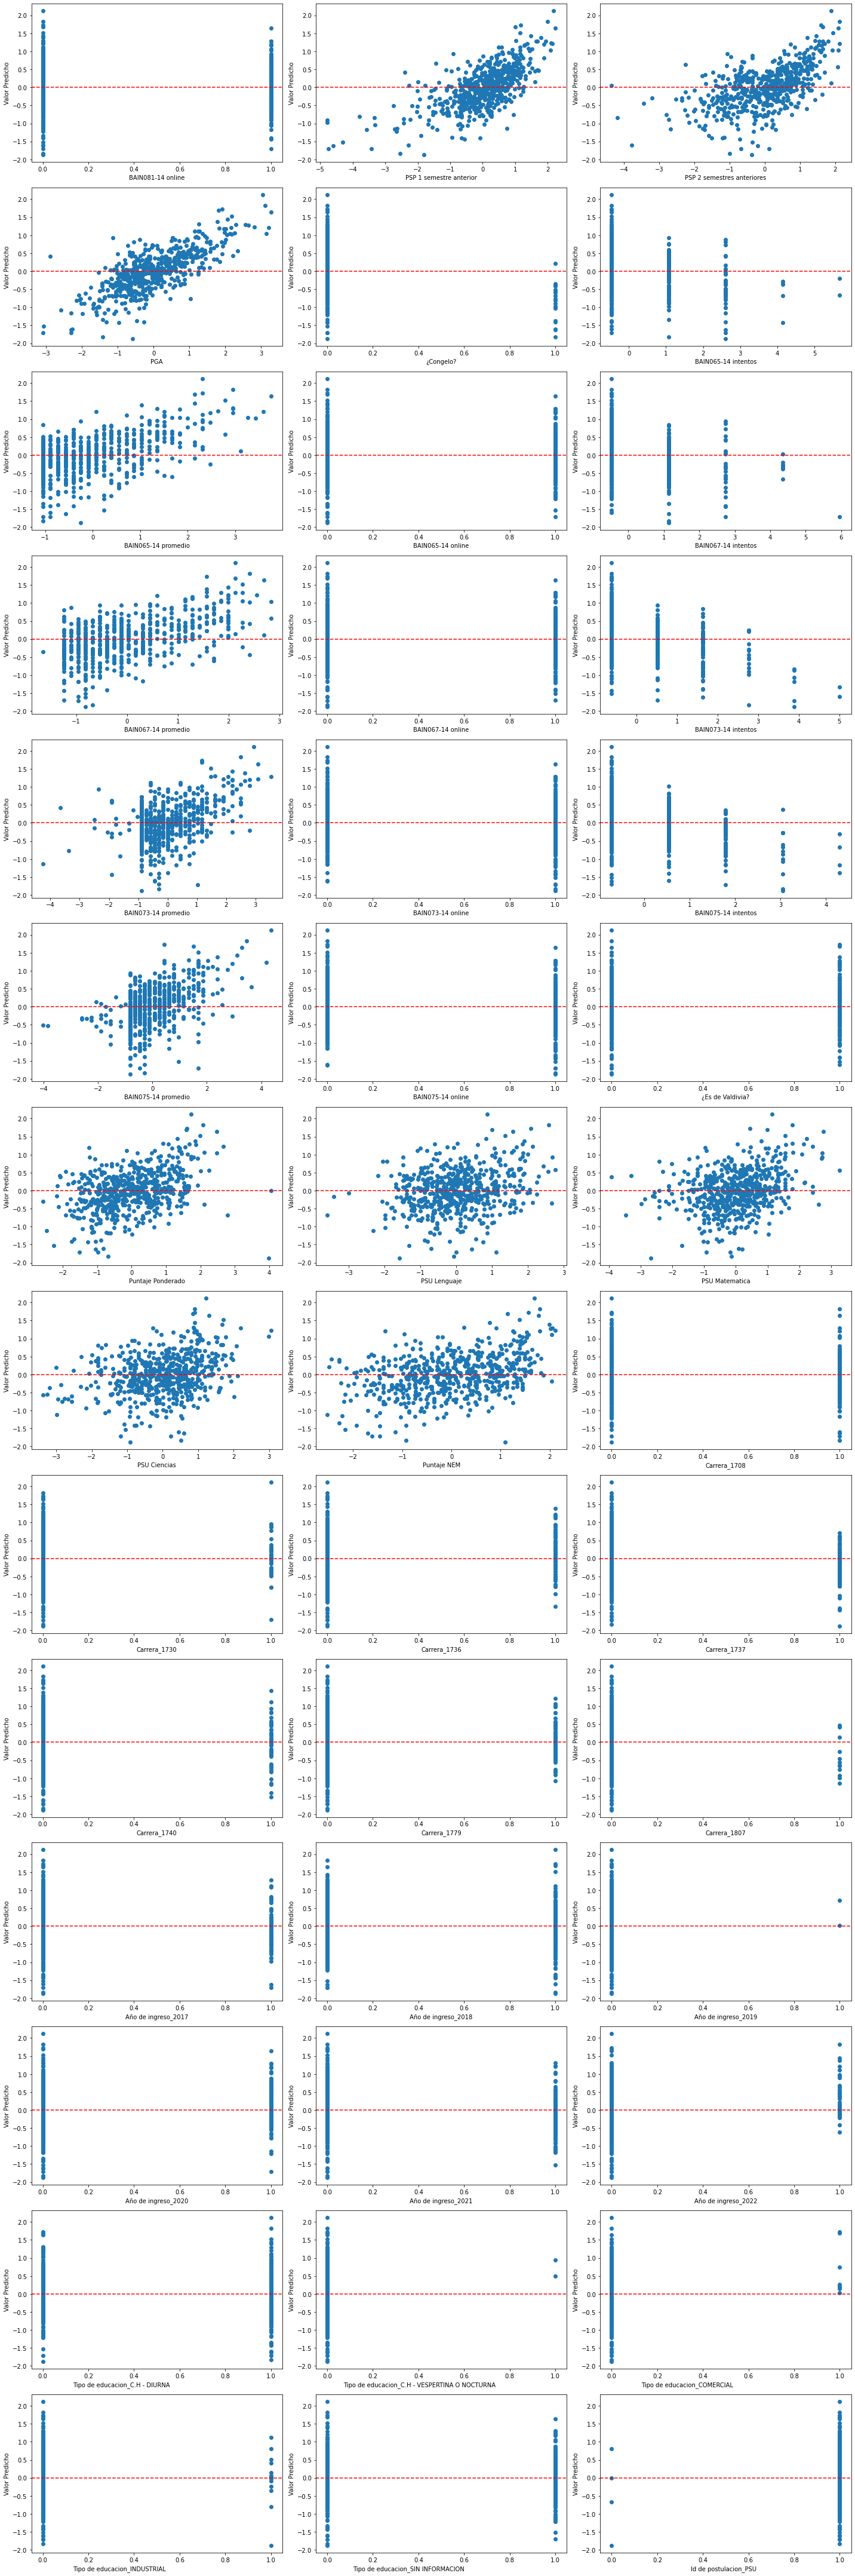

In [16]:
columns = datos_st_encoded.columns[1:]

num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión para cada variable con la línea horizontal en y=0
    ax.scatter(datos_st_encoded[var_name], hatY)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Valor Predicho')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

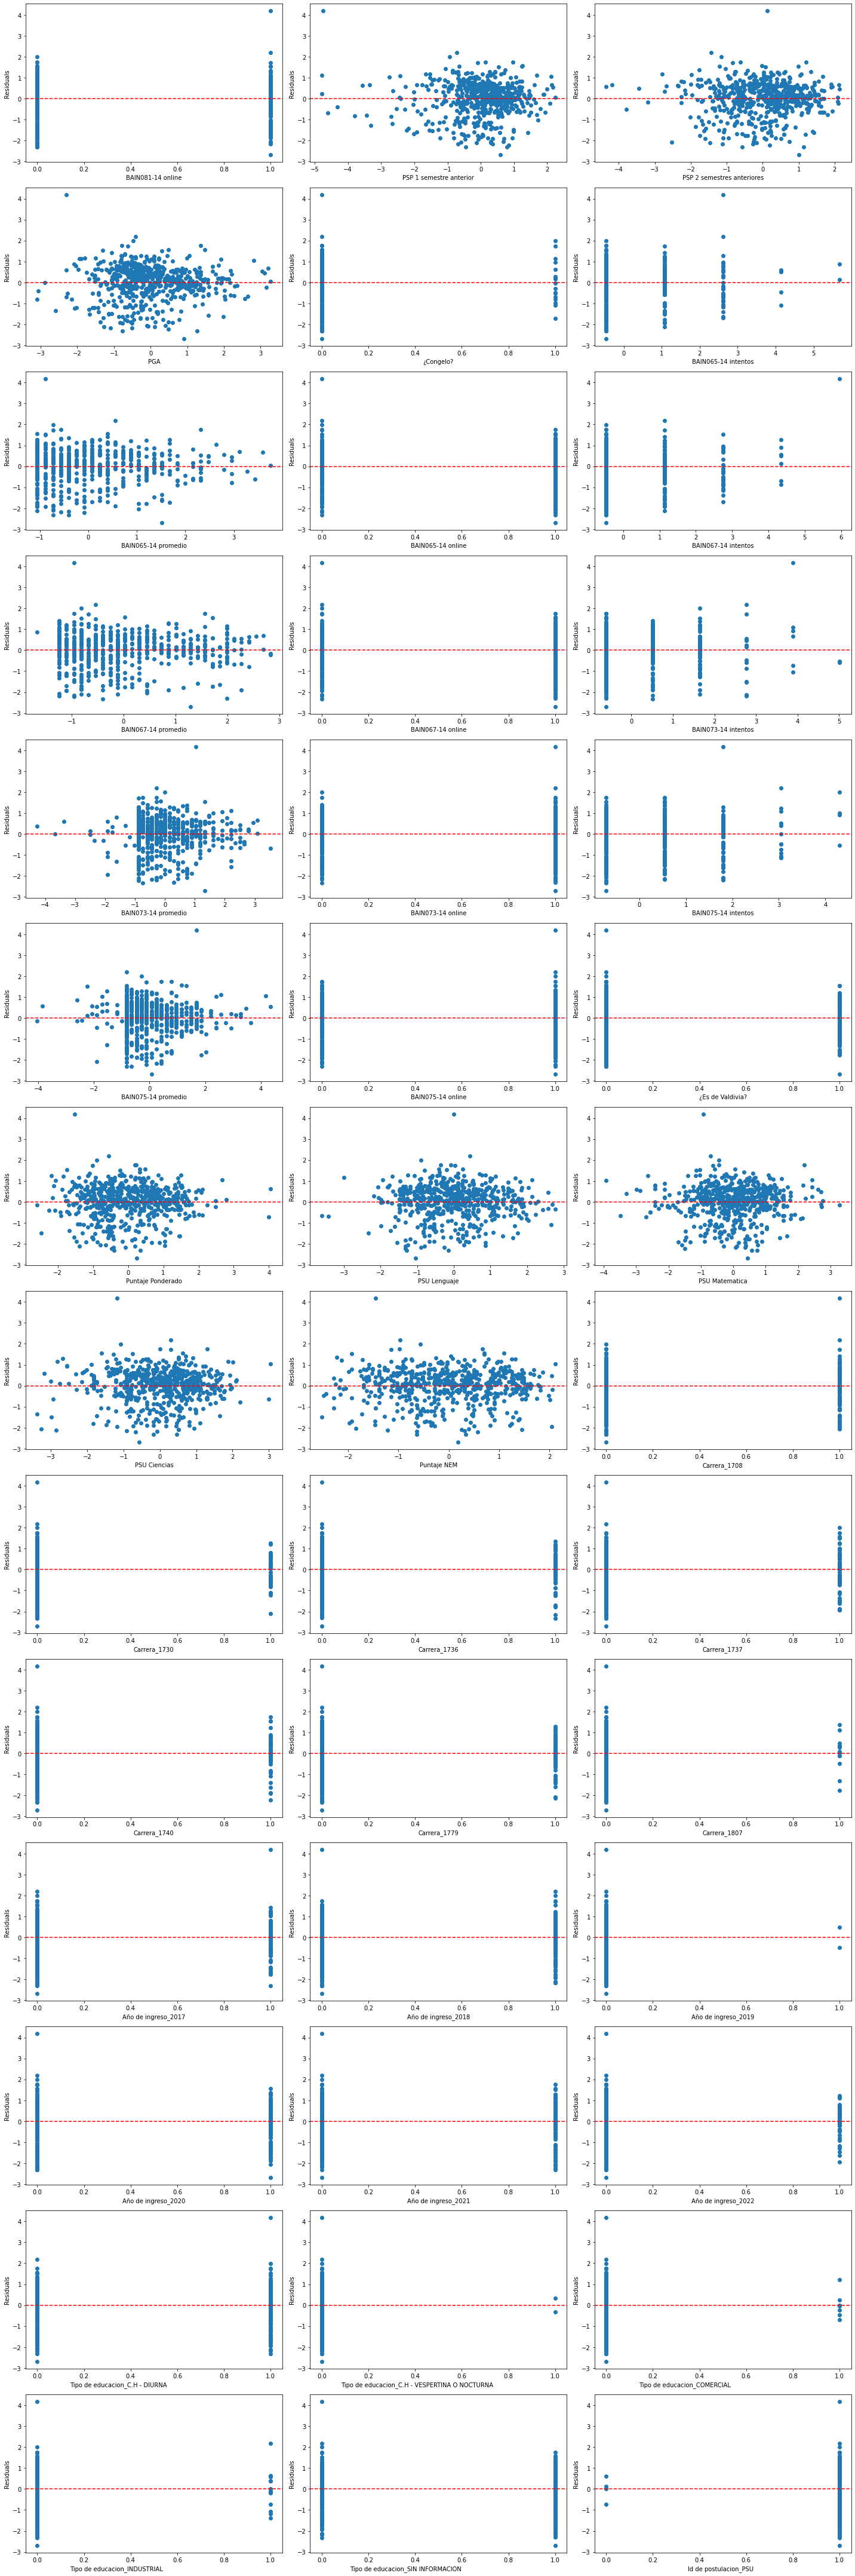

In [17]:
# Suponiendo que datos_st_encoded es un DataFrame con las variables, Y es una lista/array y hatY es una lista/array de valores predichos

columns = datos_st_encoded.columns[1:]

num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión de residuos para cada variable con la línea horizontal en y=0
    residuals = Y - hatY
    ax.scatter(datos_st_encoded[var_name], residuals)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Residuals')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Residuals')

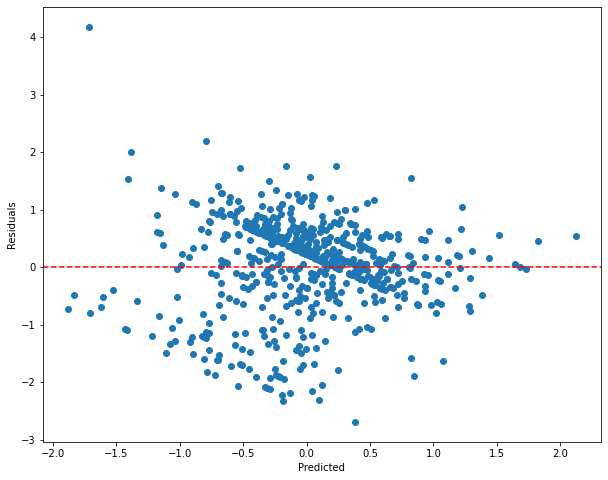

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(hatY, resid)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

In [19]:
print(stats.shapiro(resid))

ShapiroResult(statistic=0.9617503881454468, pvalue=2.2011233113961026e-11)


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = datos_st_encoded.iloc[:,1:].columns
vif["VIF"] = [variance_inflation_factor(datos_st_encoded.iloc[:,1:].values, i) for i in range(datos_st_encoded.iloc[:,1:].shape[1])]
vif = vif[vif['Variable']!='intercept']
vif = vif[vif['Variable']!='const']
display(vif)

,Variable,VIF
0,BAIN081-14 online,4.689626
1,PSP 1 semestre anterior,4.573626
2,PSP 2 semestres anteriores,3.728984
3,PGA,10.541813
4,¿Congelo?,1.183411
5,BAIN065-14 intentos,2.530907
6,BAIN065-14 promedio,2.479738
7,BAIN065-14 online,52.859035
8,BAIN067-14 intentos,2.798845
9,BAIN067-14 promedio,2.804808


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


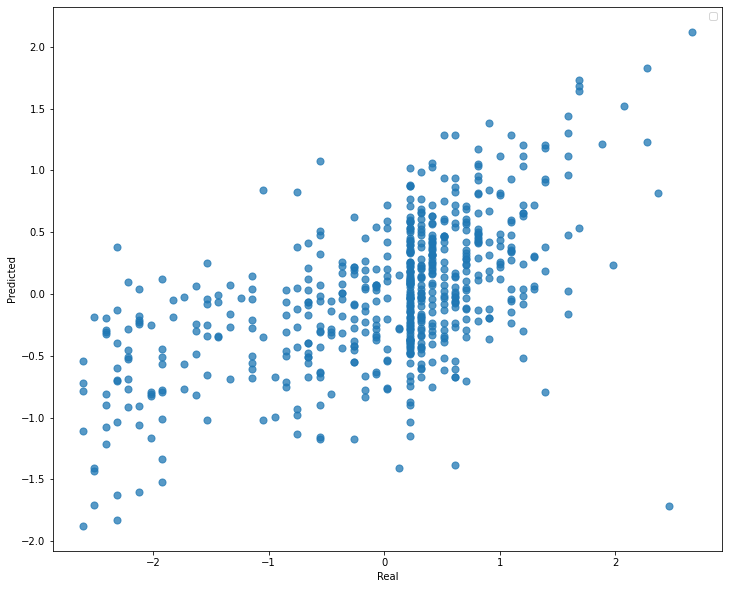

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))

# Gráfico de dispersión
ax.scatter(Y, hatY, alpha=0.75, s=50)

ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.legend()
plt.show()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.337
Model:                             OLS   Adj. R-squared:                  0.287
Method:                  Least Squares   F-statistic:                     6.728
Date:                 Thu, 14 Dec 2023   Prob (F-statistic):           6.39e-29
Time:                         10:10:50   Log-Likelihood:                -727.76
No. Observations:                  600   AIC:                             1542.
Df Residuals:                      557   BIC:                             1731.
Df Model:                           42                                         
Covariance Type:             nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.5931      1.660      1.562      0.119      -0.667       5.853
BAIN081-14 online                                                        0.2703      0.117      2.318      0.021       0.041       0.499
PSP 1 semestre anterior                                                  0.0278      0.074      0.376      0.707      -0.117       0.173
PSP 2 semestres anteriores                                              -0.0044      0.067     -0.065      0.948      -0.136       0.127
PGA                                                                      0.3426      0.112      3.053      0.002       0.122       0.563
¿Congelo?                                                               -0.3524      0.217     -1.627      0.104      -0.778       0.073
BAIN065-14 intentos                                                     -0.0299      0.055     -0.545      0.586      -0.138       0.078
BAIN065-14 promedio                                                      0.0447      0.054      0.823      0.411      -0.062       0.151
BAIN065-14 online                                                        0.2553      0.355      0.719      0.473      -0.442       0.953
BAIN067-14 intentos                                                     -0.0003      0.058     -0.005      0.996      -0.114       0.113
BAIN067-14 promedio                                                      0.0759      0.058      1.312      0.190      -0.038       0.189
BAIN067-14 online                                                       -0.6513      0.430     -1.514      0.131      -1.496       0.194
BAIN073-14 intentos                                                     -0.0914      0.058     -1.567      0.118      -0.206       0.023
BAIN073-14 promedio                                                      0.0300      0.048      0.625      0.532      -0.064       0.124
BAIN073-14 online                                                       -0.1188      0.130     -0.917      0.360      -0.373       0.136
BAIN075-14 intentos                                                     -0.0654      0.050     -1.308      0.191      -0.164       0.033
BAIN075-14 promedio                                                      0.0706      0.042      1.670      0.096      -0.012       0.154
BAIN075-14 online                                                       -0.4977      0.133     -3.743      0.000      -0.759      -0.237
¿Es de Valdivia?                                                        -0.0708      0.083     -0.856      0.392      -0.233       0.092
Puntaje Ponderado                                         